c:\users\fox\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 28779 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\fox\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 28779 missing from current font.
  font.set_text(s, 0, flags=flags)


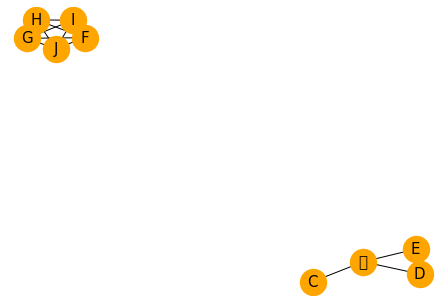

In [9]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# I build a data set: 10 individuals and 5 variables for each
ind1=[5,10,3,4,8,10,12,1,9,4]
ind5=[1,1,13,4,18,5,2,11,3,8]
# 建立矩阵
df = pd.DataFrame({ 'apple':ind1, 'B':ind1 + np.random.randint(10, size=(10)) , 'C':ind1 + np.random.randint(10, size=(10)) , 'D':ind1 + np.random.randint(5, size=(10)) , 'E':ind1 + np.random.randint(5, size=(10)), 'F':ind5, 'G':ind5 + np.random.randint(5, size=(10)) , 'H':ind5 + np.random.randint(5, size=(10)), 'I':ind5 + np.random.randint(5, size=(10)), 'J':ind5 + np.random.randint(5, size=(10))})
df
 
# Calculate the correlation between individuals. We have to transpose first, because the corr function calculate the pairwise correlations between columns.
# 计算相关性
corr = df.corr()
corr
 
# Transform it in a links data frame (3 columns only):
# 将相关系数矩阵压平
links = corr.stack().reset_index()
# 设置列名
links.columns = ['var1', 'var2','value']
#links
 
# Keep only correlation over a threshold and remove self correlation (cors (A,A)=1)
# 剔除相同编号的行以及相关系数小于0.8的行
links_filtered=links.loc[ (links['value'] > 0.8) & (links['var1'] != links['var2']) ]
#links_filtered
 
# Build your graph
# 作图
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network:
nx.draw(G, with_labels=True, node_color='orange', node_size=500, edge_color='black', linewidths=5, font_size=15)
